In [4]:
import pandas as pd
import numpy as np
from shapely.wkt import loads
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt

df = pd.read_csv('../input/train_wkt_v2.csv')
df.head()

,ImageId,ClassType,MultipolygonWKT
0,6040_2_2,1,MULTIPOLYGON EMPTY
1,6040_2_2,2,MULTIPOLYGON EMPTY
2,6040_2_2,3,MULTIPOLYGON EMPTY
3,6040_2_2,4,MULTIPOLYGON (((0.003025 -0.007879000000000001...
4,6040_2_2,5,MULTIPOLYGON (((0.005311 -0.009044999999999999...


In [8]:
df['ImageId'].unique()

array(['6040_2_2', '6120_2_2', '6120_2_0', '6090_2_0', '6040_1_3',
       '6040_1_0', '6100_1_3', '6010_4_2', '6110_4_0', '6140_3_1',
       '6110_1_2', '6100_2_3', '6150_2_3', '6160_2_1', '6140_1_2',
       '6110_3_1', '6010_4_4', '6170_2_4', '6170_4_1', '6170_0_4',
       '6060_2_3', '6070_2_3'], dtype=object)

In [27]:
df1 = pd.read_csv('../input/grid_sizes.csv')
all_images = df1['Unnamed: 0'].unique()
df = pd.read_csv('../input/train_wkt_v2.csv')
test_images = df['ImageId']
print test_images.unique()
[x for x in all_images if x not in np.asarray(test_images)]

['6040_2_2' '6120_2_2' '6120_2_0' '6090_2_0' '6040_1_3' '6040_1_0'
 '6100_1_3' '6010_4_2' '6110_4_0' '6140_3_1' '6110_1_2' '6100_2_3'
 '6150_2_3' '6160_2_1' '6140_1_2' '6110_3_1' '6010_4_4' '6170_2_4'
 '6170_4_1' '6170_0_4' '6060_2_3' '6070_2_3']


428

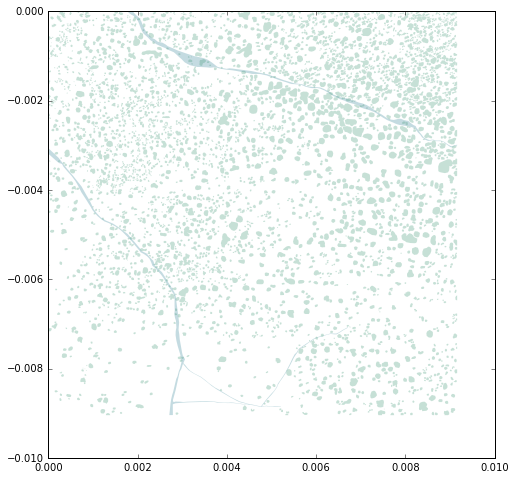

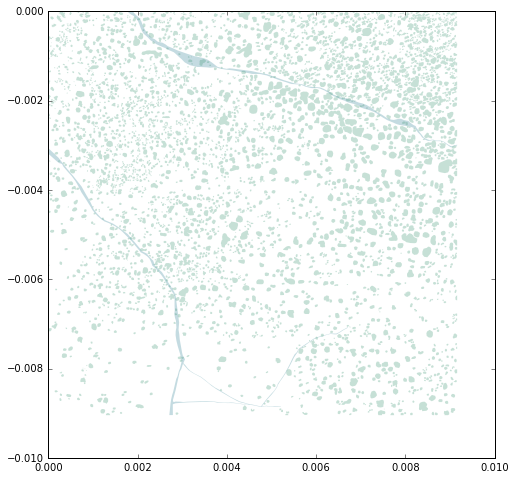

In [32]:
# Use just first image
polygonsList = {}
image = df[df.ImageId == '6040_2_2']
for cType in image.ClassType.unique():
    polygonsList[cType] = loads(image[image.ClassType == cType].MultipolygonWKT.values[0])

# plot using matplotlib

fig, ax = plt.subplots(figsize=(8, 8))

# plotting, color by class type
for p in polygonsList:
    for polygon in polygonsList[p]:
        mpl_poly = Polygon(np.array(polygon.exterior), color=plt.cm.Set1(p*10), lw=0, alpha=0.3)
        ax.add_patch(mpl_poly)

ax.relim()
ax.autoscale_view()